# Problem Statement

There are estimated to be nearly half a million species of plant in the world. Classification of species has been historically problematic and often results in duplicate identifications.

The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species.

# Dataset Description

The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

# Data fields
- id - an anonymous id unique to an image
- margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature
- shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature
- texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

# Part I: Data Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential ,layers ,optimizers ,datasets ,losses
from tensorflow.keras.layers import Dense,Dropout,Flatten , Activation , Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, LearningRateScheduler
import keras_tuner as kt
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.0,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.0,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.00000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.06250,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.00043,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.0,0.0,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.02832,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.0,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.0,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.03125,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.03125,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.000720,0.000709,0.000688,0.000660,0.000624,0.000585,0

In [6]:
train.isnull().values.any()
# No null values

False

In [9]:
train.duplicated().sum()
# no duplicated data

0

In [94]:
train['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [3]:
train["species"].value_counts()

Acer_Opalus                     10
Crataegus_Monogyna              10
Acer_Mono                       10
Magnolia_Heptapeta              10
Acer_Capillipes                 10
Populus_Nigra                   10
Alnus_Cordata                   10
Tilia_Platyphyllos              10
Eucalyptus_Neglecta             10
Quercus_Chrysolepis             10
Quercus_Cerris                  10
Quercus_Coccinea                10
Acer_Circinatum                 10
Ilex_Aquifolium                 10
Viburnum_x_Rhytidophylloides    10
Lithocarpus_Cleistocarpus       10
Acer_Rufinerve                  10
Acer_Pictum                     10
Quercus_Agrifolia               10
Alnus_Maximowiczii              10
Quercus_Palustris               10
Quercus_Phellos                 10
Liquidambar_Styraciflua         10
Cornus_Macrophylla              10
Quercus_x_Turneri               10
Quercus_Texana                  10
Quercus_Castaneifolia           10
Quercus_Infectoria_sub          10
Salix_Intergra      

In [4]:
test.head(2)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.0,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.0,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.0,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,0.003906,0.001953,0.021484,0.025391,0.005859,0.001953,0.023438,0.068359,0.000000,0.011719,0.031250,0.001953,0.011719,0.003906,0.007812,0.0,0.009766,0.003906,0.054688,0.0,0.0,0.000000,0.052734,0.000000,0.000782,0.000828,0.000876,0.000927,0.000993,0.001060,0.001123,0.001205,0.001295,0.001393,0.001496,0.001601,0.001679,0.001590,0.001492,0.001398,0.001314,0.001238,0.001186,0.001125,0.001070,0.001005,0.000943,0.000886,0.000826,0.000783,0.000741,0.000702,0.000671,0.000668,0.000682,0.000705,0.000736,0.000763,0.000805,0.000861,0.000918,0.000979,0.001054,0.001132,0.001212,0.001279,0.001364,0.001420,0.001435,0.001436,0.001418,0.001359,0.001284,0.001206,0.001134,0.001055,0.001003,0.000941,0.000879,0.000819,0.000762,0.000717,0.000698,0.000688,0.000680,0.000695,0.000719,0.000737,0.112310,0.013672,0.011719,0.004883,0.010742,0.022461,0.055664,0.028320,0.040039,0.008789,0.006836,0.0,0.008789,0.008789,0.0,0.0,0.017578,0.000977,0.025391,0.023438,0.0,0.000977,0.023438,0.000000,0.004883,0.00000,0.013672,0.001953,0.045898,0.024414,0.045898,0.0,0.0,0.070312,0.011719,0.0,0.0,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.0,0.014648,0.018555,0.0,0.0,0.0,0.015625,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.0,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.0,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.0,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,0.001953,0.009766,0.031250,0.001953,0.029297,0.007812,0.037109,0.009766,0.001953,0.058594,0.029297,0.001953,0.021484,0.003906,0.005859,0.0,0.021484,0.015625,0.048828,0.0,0.0,0.007812,0.029297,0.013672,0.000534,0.000503,0.000450,0.000499,0.000457,0.000414,0.000384,0.000359,0.000370,0.000414,0.000487,0.000500,0.000427,0.000378,0.0

In [5]:
train.shape

(990, 194)

In [76]:
test= test.drop(columns='id')
test.shape

(594, 192)

## Prepare Train and Test images

In [ ]:
import shutil # To copy files from one directory to another
import os
# Create a list of species to iterate on
labels = train.species.values.tolist() # Labels are the species of the leafs
def make_folders(verbose=False):
    folder_count = 0
    root = 'train_imgs/'   # new folder to save the files
    print('Total labels = ',len(set(labels)))
    for i in set(labels):
        os.makedirs(f'{root}{i}') # Make directories similar to Data/class_name
        folder_count += 1
    print("Total folders = ", folder_count )
    print(f"Root is {root}")
make_folders()

In [ ]:
# Since we know that we have 10 images for each class we can define a function that splits  
# the list once it reaches a length of 10
def create_chunks(list_name, n):
    for i in range(0, len(list_name), n):
        yield list_name[i:i + n]

In [ ]:
species_list = train.sort_values('species').species.unique().tolist() # Unique species
id_list = list(create_chunks(train.sort_values('species').id.values.tolist(),10)) # list of lists with sublist length of 10
dict_train = dict(zip(species_list,id_list))

In [ ]:
# Checks if the data is correct
for key,val in dict_train.items():
    assert sorted(train[train.species == key].id.tolist()) == sorted(val)

In [ ]:
for item,key in dict_train.items():
    for i in range(10):
        path1 = f'images/{str(dict_train.get(item)[i])}.jpg'
        path2 = f'train_imgs/{item}'
        shutil.move(path1,path2+'/'+str(dict_train.get(item)[i])+'.jpg')

I moved the training images from , so the rest of images in 'images' folder is the test images

Train images: train_imgs

Test images: images

#### In this project, i will work only on the tabilar data not the images

In [7]:
train.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.000110,0.0151

In [8]:
train.isnull().sum()
# No missing values

id           0
species      0
margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
margin6      0
margin7      0
margin8      0
margin9      0
margin10     0
margin11     0
margin12     0
margin13     0
margin14     0
margin15     0
margin16     0
margin17     0
margin18     0
margin19     0
margin20     0
margin21     0
margin22     0
margin23     0
margin24     0
margin25     0
margin26     0
margin27     0
margin28     0
margin29     0
margin30     0
margin31     0
margin32     0
margin33     0
margin34     0
margin35     0
margin36     0
margin37     0
margin38     0
margin39     0
margin40     0
margin41     0
margin42     0
margin43     0
margin44     0
margin45     0
margin46     0
margin47     0
margin48     0
margin49     0
margin50     0
margin51     0
margin52     0
margin53     0
margin54     0
margin55     0
margin56     0
margin57     0
margin58     0
margin59     0
margin60     0
margin61     0
margin62     0
margin63     0
margin64     0
shape1    

In [9]:
train[train.duplicated(keep=False)]

# No dublicated values

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


In [10]:
train["species"].value_counts()

Acer_Opalus                     10
Crataegus_Monogyna              10
Acer_Mono                       10
Magnolia_Heptapeta              10
Acer_Capillipes                 10
Populus_Nigra                   10
Alnus_Cordata                   10
Tilia_Platyphyllos              10
Eucalyptus_Neglecta             10
Quercus_Chrysolepis             10
Quercus_Cerris                  10
Quercus_Coccinea                10
Acer_Circinatum                 10
Ilex_Aquifolium                 10
Viburnum_x_Rhytidophylloides    10
Lithocarpus_Cleistocarpus       10
Acer_Rufinerve                  10
Acer_Pictum                     10
Quercus_Agrifolia               10
Alnus_Maximowiczii              10
Quercus_Palustris               10
Quercus_Phellos                 10
Liquidambar_Styraciflua         10
Cornus_Macrophylla              10
Quercus_x_Turneri               10
Quercus_Texana                  10
Quercus_Castaneifolia           10
Quercus_Infectoria_sub          10
Salix_Intergra      

In [11]:
train["species"].nunique()

99

## Data Visualization

In [12]:
train.head(2)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.0,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.0,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.00000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.06250,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.00043,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.0,0.0,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.02832,0.0,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.0,0.0,0.006836,0.037109,0.007812,0.0,0.00293,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.0,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.0,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.03125,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.03125,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.000720,0.000709,0.000688,0.000660,0.000624,0.000585,0

In [13]:
test.head(2)

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.0,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.0,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.0,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,0.003906,0.001953,0.021484,0.025391,0.005859,0.001953,0.023438,0.068359,0.000000,0.011719,0.031250,0.001953,0.011719,0.003906,0.007812,0.0,0.009766,0.003906,0.054688,0.0,0.0,0.000000,0.052734,0.000000,0.000782,0.000828,0.000876,0.000927,0.000993,0.001060,0.001123,0.001205,0.001295,0.001393,0.001496,0.001601,0.001679,0.001590,0.001492,0.001398,0.001314,0.001238,0.001186,0.001125,0.001070,0.001005,0.000943,0.000886,0.000826,0.000783,0.000741,0.000702,0.000671,0.000668,0.000682,0.000705,0.000736,0.000763,0.000805,0.000861,0.000918,0.000979,0.001054,0.001132,0.001212,0.001279,0.001364,0.001420,0.001435,0.001436,0.001418,0.001359,0.001284,0.001206,0.001134,0.001055,0.001003,0.000941,0.000879,0.000819,0.000762,0.000717,0.000698,0.000688,0.000680,0.000695,0.000719,0.000737,0.112310,0.013672,0.011719,0.004883,0.010742,0.022461,0.055664,0.028320,0.040039,0.008789,0.006836,0.0,0.008789,0.008789,0.0,0.0,0.017578,0.000977,0.025391,0.023438,0.0,0.000977,0.023438,0.000000,0.004883,0.00000,0.013672,0.001953,0.045898,0.024414,0.045898,0.0,0.0,0.070312,0.011719,0.0,0.0,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.0,0.014648,0.018555,0.0,0.0,0.0,0.015625,0.006836,0.0,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.0,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.0,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.0,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,0.001953,0.009766,0.031250,0.001953,0.029297,0.007812,0.037109,0.009766,0.001953,0.058594,0.029297,0.001953,0.021484,0.003906,0.005859,0.0,0.021484,0.015625,0.048828,0.0,0.0,0.007812,0.029297,0.013672,0.000534,0.000503,0.000450,0.000499,0.000457,0.000414,0.000384,0.000359,0.000370,0.000414,0.000487,0.000500,0.000427,0.000378,0.0

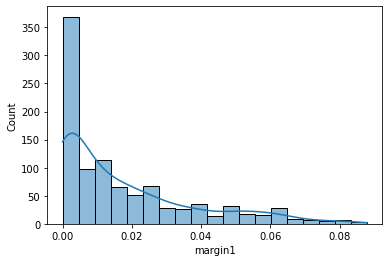

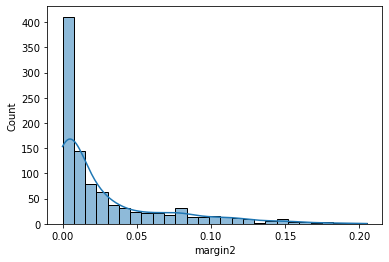

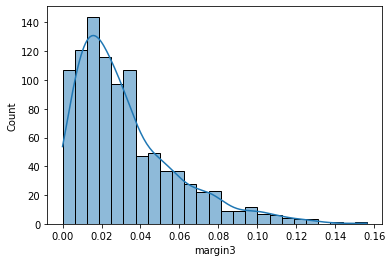

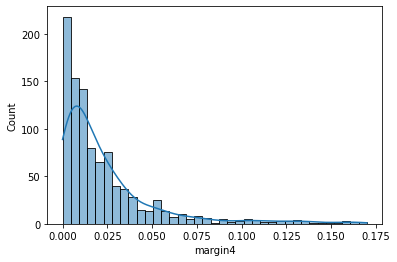

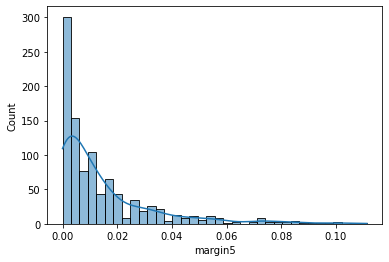

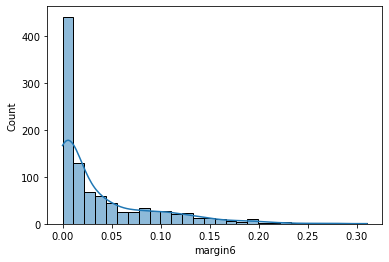

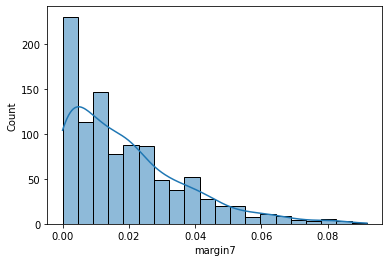

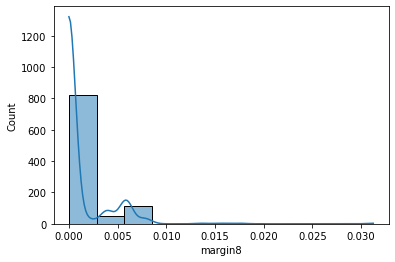

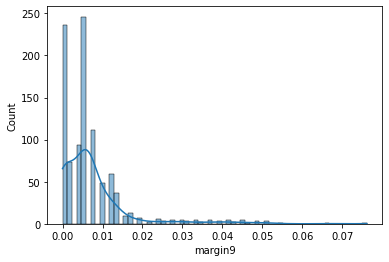

In [14]:
# Histogram of some features
A = ['margin1','margin2','margin3','margin4','margin5','margin6','margin7','margin8','margin9']
for i in A:
    sns.histplot(train[i], kde=True)
    plt.show()

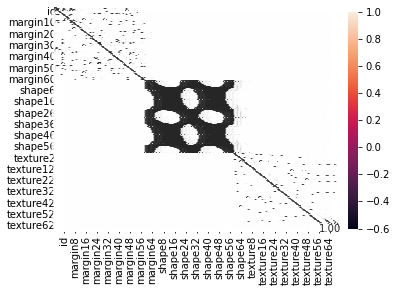

In [15]:
# correlation matrix of training dataset
sns.heatmap(train.corr(), annot=True, fmt=".2f")
plt.show()

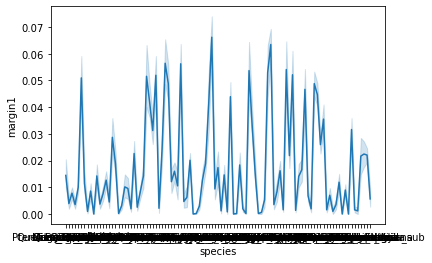

In [16]:
sns.lineplot(train['species'], train['margin1'])

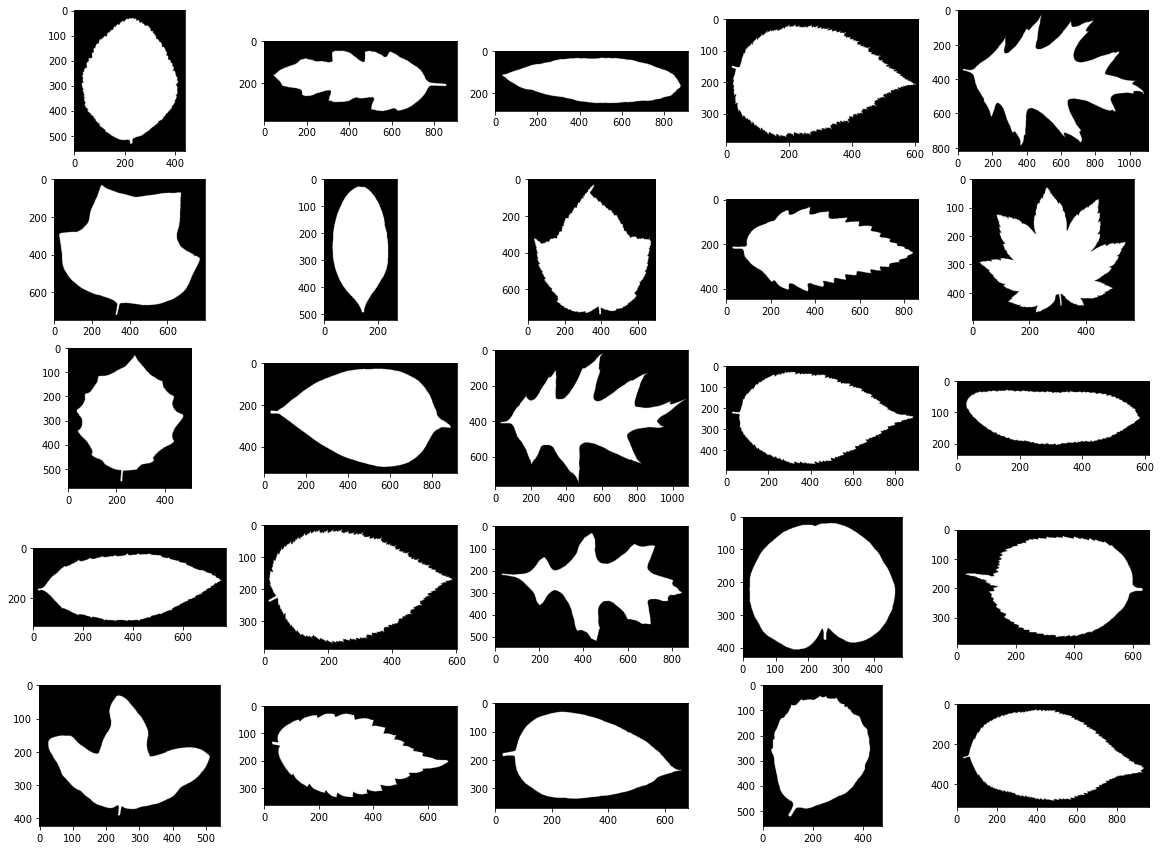

In [17]:
# Draw some of the images 
import os
plt.figure(figsize=(20,15))
import cv2 as cv
from tensorflow.keras.utils import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

## Encode the labels

Encode the labels before deviding the DataSet

In [18]:
train['species'].unique()

array(['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prun

In [19]:
  # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train['species']= label_encoder.fit_transform(train['species'])
  
train['species'].unique()

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 13, 66, 15,  6, 73, 22, 36, 27, 88, 12, 28, 21, 25,
       20, 60, 69, 23, 76, 18, 52,  9, 48, 47, 64, 81, 62, 34, 92, 79, 82,
       32, 35, 72, 71, 11, 51,  5,  8, 37, 97, 33,  1, 59, 56, 57, 29, 93,
       10, 46,  0, 39,  2, 24, 26, 87, 55, 38, 45,  7, 67, 30, 61, 96, 41,
       85, 14, 17, 42, 63, 86, 80, 77, 19, 95, 70, 90, 68, 91])

### Devide the dataset

In [20]:
X_train, X_test, y_train, y_test= train_test_split(train.drop(columns=['id','species']),
                                                   train['species'] ,
                                                   random_state=42, 
                                                   test_size=0.2, 
                                                   shuffle=True)

In [21]:
print(X_train.mean())

margin1      0.017110
margin2      0.028111
margin3      0.031894
margin4      0.022577
margin5      0.014454
margin6      0.038700
margin7      0.019373
margin8      0.001075
margin9      0.007102
margin10     0.018668
margin11     0.023603
margin12     0.012143
margin13     0.041428
margin14     0.008034
margin15     0.015938
margin16     0.000086
margin17     0.015102
margin18     0.019844
margin19     0.012020
margin20     0.013095
margin21     0.019341
margin22     0.006323
margin23     0.000937
margin24     0.007808
margin25     0.009031
margin26     0.019090
margin27     0.005775
margin28     0.015783
margin29     0.027849
margin30     0.016858
margin31     0.011213
margin32     0.009973
margin33     0.019297
margin34     0.001164
margin35     0.013090
margin36     0.017524
margin37     0.016298
margin38     0.031472
margin39     0.015179
margin40     0.008424
margin41     0.010885
margin42     0.017235
margin43     0.019016
margin44     0.012981
margin45     0.023834
margin46  

There is a difference in mean for the features, so we can do standarization to the data. For Example:

- shape35:::      0.000690
- texture1:::     0.020690

In [22]:
print(X_train.std())

margin1      0.019466
margin2      0.037968
margin3      0.025598
margin4      0.028015
margin5      0.017992
margin6      0.052312
margin7      0.017359
margin8      0.002631
margin9      0.009167
margin10     0.016071
margin11     0.025400
margin12     0.011753
margin13     0.047648
margin14     0.013299
margin15     0.014334
margin16     0.000888
margin17     0.010787
margin18     0.021390
margin19     0.013482
margin20     0.009646
margin21     0.019822
margin22     0.010285
margin23     0.004182
margin24     0.013077
margin25     0.013091
margin26     0.012535
margin27     0.011084
margin28     0.014354
margin29     0.022567
margin30     0.016951
margin31     0.016745
margin32     0.019480
margin33     0.015877
margin34     0.002170
margin35     0.013108
margin36     0.015732
margin37     0.011489
margin38     0.023418
margin39     0.013360
margin40     0.010374
margin41     0.021833
margin42     0.014513
margin43     0.020911
margin44     0.011940
margin45     0.023651
margin46  

There is a difference in std for the features, so we can do standarization to the data. For Example:

- shape1   :    0.000275
- margin55 :     0.021317

#### So, we can use StandardScaler to standarize our data

In [23]:
X_train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
910,0.060547,0.0625,0.013672,0.011719,0.001953,0.13086,0.013672,0.0,0.0,0.033203,0.048828,0.003906,0.054688,0.0,0.001953,0.0,0.021484,0.033203,0.003906,0.023438,0.005859,0.0,0.0,0.0,0.0,0.017578,0.0,0.001953,0.007812,0.017578,0.0,0.0,0.064453,0.0,0.056641,0.041016,0.011719,0.013672,0.0,0.0,0.001953,0.007812,0.021484,0.001953,0.027344,0.0,0.007812,0.007812,0.0,0.0,0.072266,0.0,0.001953,0.0,0.0,0.0,0.027344,0.029297,0.007812,0.001953,0.0,0.0,0.025391,0.0,0.00048,0.000421,0.000394,0.000353,0.0003,0.000292,0.000358,0.000429,0.000426,0.000402,0.000377,0.000348,0.000403,0.000423,0.000396,0.000346,0.000317,0.000269,0.000296,0.000283,0.000364,0.000361,0.000414,0.000454,0.000479,0.000421,0.00035,0.000351,0.000376,0.000395,0.000419,0.00047,0.000447,0.000385,0.000311,0.000245,0.000224,0.000267,0.00032,0.000351,0.00039,0.000424,0.000464,0.000513,0.000447,0.000406,0.000359,0.000285,0.000227,0.000299,0.000356,0.000405,0.000453,0.000497,0.000442,0.000389,0.000354,0.000303,0.000249,0.000197,0.000289,0.000359,0.00041,0.000482,0.010742,0.010742,0.011719,0.00293,0.084961,0.0,0.005859,0.027344,0.0,0.003906,0.0,0.17578,0.001953,0.0,0.0,0.0,0.014648,0.027344,0.015625,0.00293,0.0,0.0,0.003906,0.000977,0.006836,0.0,0.006836,0.018555,0.0,0.006836,0.0,0.0,0.0,0.060547,0.024414,0.0,0.0,0.013672,0.005859,0.000977,0.0,0.0,0.00293,0.014648,0.006836,0.037109,0.00293,0.10156,0.000977,0.0,0.0,0.0,0.000977,0.00293,0.27246,0.0,0.00293,0.0,0.0,0.0,0.0,0.000977,0.0,0.006836


In [24]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# apply standardization on numerical features
for i in X_train.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [25]:
X_train_stand.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
910,2.232887,0.906312,-0.712293,-0.387819,-0.695208,1.762833,-0.328643,-0.40883,-0.775273,0.904969,0.993764,-0.701246,0.278476,-0.604497,-0.976293,-0.097276,0.592024,0.624916,-0.602188,1.072913,-0.680593,-0.615174,-0.224245,-0.597414,-0.690249,-0.120681,-0.521395,-0.96411,-0.88847,0.042505,-0.670049,-0.512259,2.845975,-0.536652,3.324675,1.494217,-0.398836,-0.760569,-1.136825,-0.812565,-0.409369,-0.64971,0.118105,-0.924261,0.148484,-0.799625,-0.813266,-0.647662,-0.541471,-0.804613,1.951215,-0.355376,-1.207961,-0.656044,-0.861719,-0.69115,1.469446,0.519331,-0.727411,-0.804876,-0.610387,-0.486454,0.014645,-0.46752,-0.936586,-1.100824,-1.146749,-1.250914,-1.396213,-1.362878,-1.028115,-0.670896,-0.597914,-0.60275,-0.616439,-0.64809,-0.449109,-0.365678,-0.414921,-0.532024,-0.596843,-0.728853,-0.671457,-0.739804,-0.56124,-0.631549,-0.533151,-0.467034,-0.449049,-0.757964,-1.136325,-1.205451,-1.167538,-1.153394,-1.108282,-0.950264,-1.03943,-1.237852,-1.483504,-1.698291,-1.747601,-1.494315,-1.174412,-0.935914,-0.683503,-0.48469,-0.309351,-0.123674,-0.305408,-0.409858,-0.531971,-0.724886,-0.888752,-0.699788,-0.554843,-0.43983,-0.324319,-0.208413,-0.437536,-0.691338,-0.897502,-1.179268,-1.484144,-1.764009,-1.459861,-1.255654,-1.133336,-0.922104,-0.240598,-0.051861,0.125209,-0.572009,1.526262,-0.477691,-0.504354,0.31671,-0.644488,-0.424365,-0.57862,2.051837,-0.545566,-0.694321,-0.189859,-0.387426,-0.00385,1.438717,-0.274745,-0.703049,-0.279887,-0.624398,-0.532416,-0.524587,-0.217268,-0.574596,-0.429596,0.471995,-0.809632,-0.358412,-0.89784,-0.411406,-0.399267,0.867073,1.22439,-0.248269,-0.378986,-0.36132,-0.508507,-0.712644,-0.390443,-0.555167,-0.601239,-0.233383,-0.432301,0.614196,-0.9806,2.839255,-0.7919,-0.700657,-0.403653,-0.532072,-0.633691,-0.691266,3.820565,-0.269647,-0.544939,-0.471005,-1.054918,-0.233085,-0.230263,-0.504347,-0.64742,-0.536169


In [26]:
X_train_stand.shape

(792, 192)

In [27]:
X_test_stand.shape

(198, 192)

Now we have our data ready:

X_train_stand, X_test_stand, y_train, y_test

# Part II: Training a neural network

First Trial: a 3-layer MLP model (one input layer, one hidden layer 
with tanh activation and one output layer)

In [28]:
model = Sequential(
    [
        Dense(units=192, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        Dropout(0.2),
        Dense(units=256, activation="tanh"),
        # the output layer, with a single neuron
        Dense(units=99, activation="softmax"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               37056     
                                                                 
 dropout (Dropout)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               49408     
                                                                 
 dense_2 (Dense)             (None, 99)                25443     
                                                                 
Total params: 111,907
Trainable params: 111,907
Non-trainable params: 0
_________________________________________________________________


In [30]:
tf.random.set_seed(42)
filepath = 'model1.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

opt=optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt ,loss="sparse_categorical_crossentropy", metrics=["accuracy"] )
#model.summary()
#Train Model
result=model.fit(X_train_stand , y_train ,batch_size=64 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv], validation_split=0.2)

Epoch 1/50
 1/10 [==>...........................] - ETA: 5s - loss: 4.8307 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.72327, saving model to model1.hdf5
10/10 [==============================] - 2s 117ms/step - loss: 2.9972 - accuracy: 0.3444 - val_loss: 1.1380 - val_accuracy: 0.7233
Epoch 2/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.8554 - accuracy: 0.8594
Epoch 2: val_accuracy improved from 0.72327 to 0.85535, saving model to model1.hdf5
10/10 [==============================] - 0s 11ms/step - loss: 0.6156 - accuracy: 0.8468 - val_loss: 0.4525 - val_accuracy: 0.8553
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.9375
Epoch 3: val_accuracy improved from 0.85535 to 0.93082, saving model to model1.hdf5
10/10 [==============================] - 0s 11ms/step - loss: 0.1968 - accuracy: 0.9494 - val_loss: 0.2094 - val_accuracy: 0.9308
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.0673

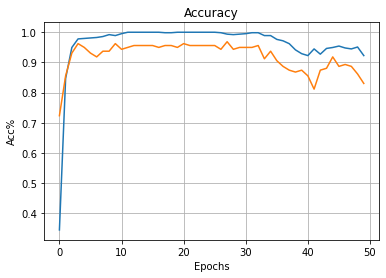

In [31]:
plt.plot(result.history["accuracy"])
plt.plot(result.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc%")
plt.grid()

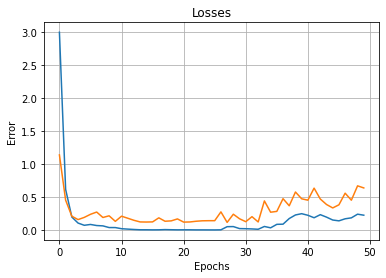

In [32]:
plt.plot(result.history["loss"])
plt.plot(result.history["val_loss"])
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid()

In [33]:
model.evaluate(X_test_stand,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.8687


[0.45618608593940735, 0.868686854839325]

# Fine Tuning to find the best hyperparameters
Using the same model will try to find the best possible heperparam to acheive the best performance

- Tring Different Activation fun for the first layer: ['relu', 'tanh', 'sigmoid']
- Tring Different Dropout vaues for the first layer: [ min_value=0.0,max_value=0.5,default=0.25,step=0.05]
- Hidden size: Try using different number of hidden nodes in the second layer: [min_value=32, max_value=512, step=32]
- Tune the learning rate for the optimizer, Choose an optimal value from 0.01, 0.001, or 0.0001 and Also i will use learning rate scheduler later.

In [34]:
def model_builder(hp):
    
    model = Sequential()
    model.add(Dense(units=192, activation = hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],
                                                                   default='relu')))
                    #input_shape=(X_train.shape[-1],) ))
    
    model.add(Dropout(hp.Float('dropout', min_value=0.0,max_value=0.5,default=0.25,step=0.05)))

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)

    model.add(Dense(units=hp_units, activation='tanh'))
    model.add(Dense(99 , activation="softmax"))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#     model.fit(X_train_stand , y_train ,batch_size= hp.Choice('batch_sizee',values=[32, 64, 128], default = 32
#               ,epochs=50 ,
#                callbacks=[earlyStopping, mcp_save], validation_split=0.2)

    return model

In [35]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                 #    factor=3,
                     directory='models',
                     project_name='modelN')

In [36]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)
tensorboard = TensorBoard("/models/tb_logs")
tuner.search(X_train_stand, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early,tensorboard])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the second densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')} Activation function for first layer is {best_hps.get('dense_activation')} and 
Dropout after first layer by: {best_hps.get('dropout')}.
""")

Trial 30 Complete [00h 00m 08s]
val_accuracy: 0.9119496941566467

Best val_accuracy So Far: 0.9748427867889404
Total elapsed time: 00h 03m 13s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the second densely-connected
layer is 192 and the optimal learning rate for the optimizer
is 0.01 Activation function for first layer is tanh and 
Dropout after first layer by: 0.2.



In [51]:
%reload_ext tensorboard
%tensorboard --logdir runs

ERROR: Could not find '/path/to/envs/my_env/bin/tensorboard' (set by
the `TENSORBOARD_BINARY` environment variable). Please ensure that
your PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

In [42]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
dense_activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
dropout (Float)
{'default': 0.25, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.05, 'sampling': None}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [43]:
# build the best model and train it
tf.random.set_seed(42)
filepath = 'model2.hdf5'
earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

print("[INFO] training the best model...")
modell = tuner.hypermodel.build(best_hps)
H = modell.fit(X_train_stand, y_train, validation_split=0.2, batch_size=32, epochs=50,
              callbacks=[earlyStopping, checkpoint_conv], verbose=1)

[INFO] training the best model...
Epoch 1/50
16/20 [=======================>......] - ETA: 0s - loss: 2.7753 - accuracy: 0.3906     
Epoch 1: val_accuracy improved from -inf to 0.72327, saving model to model2.hdf5
20/20 [==============================] - 2s 51ms/step - loss: 2.5014 - accuracy: 0.4423 - val_loss: 1.0903 - val_accuracy: 0.7233
Epoch 2/50
13/20 [==================>...........] - ETA: 0s - loss: 0.5497 - accuracy: 0.8750
Epoch 2: val_accuracy improved from 0.72327 to 0.89937, saving model to model2.hdf5
20/20 [==============================] - 0s 8ms/step - loss: 0.4677 - accuracy: 0.8878 - val_loss: 0.3413 - val_accuracy: 0.8994
Epoch 3/50
13/20 [==================>...........] - ETA: 0s - loss: 0.1722 - accuracy: 0.9519
Epoch 3: val_accuracy improved from 0.89937 to 0.93711, saving model to model2.hdf5
20/20 [==============================] - 0s 9ms/step - loss: 0.1542 - accuracy: 0.9573 - val_loss: 0.1957 - val_accuracy: 0.9371
Epoch 4/50
14/20 [====================>...

Epoch 30/50
14/20 [====================>.........] - ETA: 0s - loss: 6.5581e-04 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.97484
20/20 [==============================] - 0s 6ms/step - loss: 6.7088e-04 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9623
Epoch 31/50
14/20 [====================>.........] - ETA: 0s - loss: 6.2372e-04 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.97484
20/20 [==============================] - 0s 7ms/step - loss: 5.9207e-04 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9623
Epoch 32/50
13/20 [==================>...........] - ETA: 0s - loss: 5.2308e-04 - accuracy: 1.0000
Epoch 32: val_accuracy did not improve from 0.97484
20/20 [==============================] - 0s 6ms/step - loss: 5.1912e-04 - accuracy: 1.0000 - val_loss: 0.0938 - val_accuracy: 0.9623
Epoch 33/50
14/20 [====================>.........] - ETA: 0s - loss: 5.4768e-04 - accuracy: 1.0000
Epoch 33: val_accuracy did not improve from 0.974

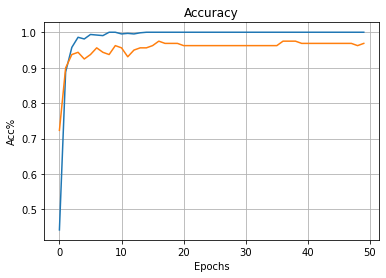

In [44]:
plt.plot(H.history["accuracy"])
plt.plot(H.history["val_accuracy"])
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc%")
plt.grid()

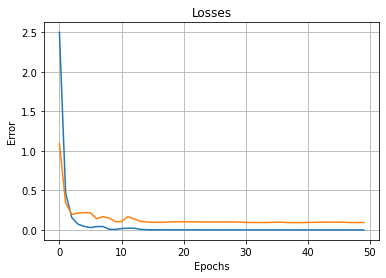

In [45]:
plt.plot(H.history["loss"])
plt.plot(H.history["val_loss"])
plt.title("Losses")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.grid()

In [46]:
modell.evaluate(X_test_stand,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9899


[0.05614694952964783, 0.9898989796638489]

In [47]:
modell.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 192)               37056     
                                                                 
 dropout_1 (Dropout)         (None, 192)               0         
                                                                 
 dense_4 (Dense)             (None, 192)               37056     
                                                                 
 dense_5 (Dense)             (None, 99)                19107     
                                                                 
Total params: 93,219
Trainable params: 93,219
Non-trainable params: 0
_________________________________________________________________


### Trying differnet hyperparameters:

The optimal number of units in the second densely-connected
layer is 384 and the optimal learning rate for the optimizer
is 0.001 Activation function for first layer is tanh and 
Dropout after first layer by: 0.1.

- batch_size = [16,32,64]
- Optimizer: Try using different optimizers such as Adam, SGD RMSProp
- Regularization (weight decay): L2 regularization can be specified by setting the weight_decay parameter in optimizer. [0.001, 0.01, 0.1]
- LearningRateScheduler

#### I will manualy try 9 different combination of these hyperparameters and choose the best combination of them with the ones from the previous Tuning.

In [58]:
# keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [59]:
Model = Sequential(
    [
        Dense(units=192, activation="tanh", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        Dropout(0.1),
        Dense(units=384, activation="tanh"),
        # the output layer, with a single neuron
        Dense(units=99, activation="softmax"),
    ]
)

## 1

- batch_ size = 16
- Optimizer = Adam
- decay = 0.001

In [62]:
tf.random.set_seed(42)
filepath = '1model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=Adam(decay = 0.001 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=16 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
31/40 [======================>.......] - ETA: 0s - loss: 2.8452 - accuracy: 0.4214   
Epoch 1: val_accuracy improved from -inf to 0.72327, saving model to 1model.hdf5
40/40 [==============================] - 1s 18ms/step - loss: 2.5732 - accuracy: 0.4692 - val_loss: 1.0953 - val_accuracy: 0.7233 - lr: 0.0100
Epoch 2/50
39/40 [============================>.] - ETA: 0s - loss: 0.7205 - accuracy: 0.8061
Epoch 2: val_accuracy improved from 0.72327 to 0.83648, saving model to 1model.hdf5
40/40 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.8073 - val_loss: 0.6483 - val_accuracy: 0.8365 - lr: 0.0100
Epoch 3/50
39/40 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.9119
Epoch 3: val_accuracy improved from 0.83648 to 0.84906, saving model to 1model.hdf5
40/40 [==============================] - 0s 4ms/step - loss: 0.4183 - accuracy: 0.9115 - val_loss: 0.7070 - val_accuracy: 0.8491 - lr: 0.0100
Epoch 4/50
40/40 [=====================

[0.19620448350906372, 0.9494949579238892]

## 2
- batch_ size = 16
- Optimizer = Adam
- decay = 0.01

In [63]:
tf.random.set_seed(42)
filepath = '2model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=Adam(decay = 0.01 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=16 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
21/40 [==============>...............] - ETA: 0s - loss: 0.1532 - accuracy: 0.9702     
Epoch 1: val_accuracy improved from -inf to 0.89937, saving model to 2model.hdf5
40/40 [==============================] - 1s 15ms/step - loss: 0.1804 - accuracy: 0.9589 - val_loss: 0.3901 - val_accuracy: 0.8994 - lr: 0.0100
Epoch 2/50
20/40 [==============>...............] - ETA: 0s - loss: 0.2779 - accuracy: 0.9500
Epoch 2: val_accuracy improved from 0.89937 to 0.91824, saving model to 2model.hdf5
40/40 [==============================] - 0s 4ms/step - loss: 0.2091 - accuracy: 0.9558 - val_loss: 0.3070 - val_accuracy: 0.9182 - lr: 0.0100
Epoch 3/50
37/40 [==========================>...] - ETA: 0s - loss: 0.0573 - accuracy: 0.9831
Epoch 3: val_accuracy did not improve from 0.91824
40/40 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.2889 - val_accuracy: 0.9182 - lr: 0.0100
Epoch 4/50
18/40 [============>.................] - ETA: 0s - loss: 0.

[0.2511470317840576, 0.9444444179534912]

## 3
- batch_ size = 16
- Optimizer = Adam
- decay = 0.001

In [64]:
tf.random.set_seed(42)
filepath = '3model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=Adam(decay = 0.001 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=16 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
39/40 [============================>.] - ETA: 0s - loss: 0.3384 - accuracy: 0.9567   
Epoch 1: val_accuracy improved from -inf to 0.88050, saving model to 3model.hdf5
40/40 [==============================] - 1s 15ms/step - loss: 0.3336 - accuracy: 0.9573 - val_loss: 0.3979 - val_accuracy: 0.8805 - lr: 0.0100
Epoch 2/50
39/40 [============================>.] - ETA: 0s - loss: 0.1814 - accuracy: 0.9455
Epoch 2: val_accuracy did not improve from 0.88050
40/40 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9463 - val_loss: 0.5828 - val_accuracy: 0.8679 - lr: 0.0100
Epoch 3/50
16/40 [===========>..................] - ETA: 0s - loss: 0.2976 - accuracy: 0.9297
Epoch 3: val_accuracy improved from 0.88050 to 0.90566, saving model to 3model.hdf5
40/40 [==============================] - 0s 4ms/step - loss: 0.2556 - accuracy: 0.9321 - val_loss: 0.4324 - val_accuracy: 0.9057 - lr: 0.0100
Epoch 4/50
18/40 [============>.................] - ETA: 0s - loss: 0.33

40/40 [==============================] - 0s 3ms/step - loss: 1.4952e-04 - accuracy: 1.0000 - val_loss: 0.2366 - val_accuracy: 0.9308 - lr: 0.0017
Epoch 29/50
21/40 [==============>...............] - ETA: 0s - loss: 6.1178e-05 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 3ms/step - loss: 1.0685e-04 - accuracy: 1.0000 - val_loss: 0.2363 - val_accuracy: 0.9308 - lr: 0.0015
Epoch 30/50
32/40 [=======================>......] - ETA: 0s - loss: 1.4466e-04 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 4ms/step - loss: 1.3169e-04 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9308 - lr: 0.0014
Epoch 31/50
24/40 [=================>............] - ETA: 0s - loss: 1.0918e-04 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 3ms/step - loss: 1.5158e-04 - accuracy: 1.0000 - val_loss: 0.2352

[0.43280479311943054, 0.9292929172515869]

## 4
- batch_ size = 16
- Optimizer = SGD
- decay = 0.01

In [65]:
tf.random.set_seed(42)
filepath = '4model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=SGD(decay = 0.1 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=16 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
17/40 [===========>..................] - ETA: 0s - loss: 7.8987e-05 - accuracy: 1.0000 
Epoch 1: val_accuracy improved from -inf to 0.93082, saving model to 4model.hdf5
40/40 [==============================] - 1s 17ms/step - loss: 6.1218e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 2/50
18/40 [============>.................] - ETA: 0s - loss: 4.4810e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.93082
40/40 [==============================] - 0s 3ms/step - loss: 5.1424e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 3/50
21/40 [==============>...............] - ETA: 0s - loss: 8.4194e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.93082
40/40 [==============================] - 0s 3ms/step - loss: 1.0536e-04 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 4/50
37/40 [==========================>...] - ETA: 0s - loss: 2.4798e-04 - ac

Epoch 29/50
12/40 [========>.....................] - ETA: 0s - loss: 2.3342e-05 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.93082
40/40 [==============================] - 0s 3ms/step - loss: 8.1796e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0015
Epoch 30/50
28/40 [====================>.........] - ETA: 0s - loss: 8.7395e-05 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.93082
40/40 [==============================] - 0s 3ms/step - loss: 8.1051e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0014
Epoch 31/50
28/40 [====================>.........] - ETA: 0s - loss: 8.6273e-05 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.93082
40/40 [==============================] - 0s 3ms/step - loss: 9.3672e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0012
Epoch 32/50
26/40 [==================>...........] - ETA: 0s - loss: 8.7658e-05 - accuracy: 1.0000
Epoch 32: 

[0.43279093503952026, 0.9292929172515869]

## 5
- batch_ size = 32
- Optimizer = SGD
- decay = 0.01

In [66]:
tf.random.set_seed(42)
filepath = '5model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=SGD(decay = 0.01 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=32 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
18/20 [==========================>...] - ETA: 0s - loss: 2.0217e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.93082, saving model to 5model.hdf5
20/20 [==============================] - 1s 28ms/step - loss: 1.8575e-04 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 2/50
16/20 [=======================>......] - ETA: 0s - loss: 5.5398e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.93082
20/20 [==============================] - 0s 5ms/step - loss: 5.4658e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 3/50
19/20 [===========================>..] - ETA: 0s - loss: 7.9842e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.93082
20/20 [==============================] - 0s 4ms/step - loss: 7.8435e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 4/50
14/20 [====================>.........] - ETA: 0s - loss: 1.8130e-04 - acc

Epoch 29/50
19/20 [===========================>..] - ETA: 0s - loss: 1.2098e-04 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.93082
20/20 [==============================] - 0s 4ms/step - loss: 1.2343e-04 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0015
Epoch 30/50
 1/20 [>.............................] - ETA: 0s - loss: 2.0193e-05 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.93082
20/20 [==============================] - 0s 3ms/step - loss: 7.0101e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0014
Epoch 31/50
 1/20 [>.............................] - ETA: 0s - loss: 5.4984e-05 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.93082
20/20 [==============================] - 0s 4ms/step - loss: 1.5182e-04 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0012
Epoch 32/50
 1/20 [>.............................] - ETA: 0s - loss: 2.8968e-05 - accuracy: 1.0000
Epoch 32: 

[0.43268677592277527, 0.9292929172515869]

## 6
- batch_ size = 64
- Optimizer = SGD
- decay = 0.01

In [67]:
tf.random.set_seed(42)
filepath = '6model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=SGD(decay = 0.01 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=64 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
 1/10 [==>...........................] - ETA: 2s - loss: 1.3028e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.93082, saving model to 6model.hdf5
10/10 [==============================] - 1s 59ms/step - loss: 8.0530e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 5.5222e-05 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.93082
10/10 [==============================] - 0s 9ms/step - loss: 5.5222e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 2.8565e-05 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.93082
10/10 [==============================] - 0s 8ms/step - loss: 8.6944e-05 - accuracy: 1.0000 - val_loss: 0.2333 - val_accuracy: 0.9308 - lr: 0.0100
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.4628e-05 - acc

Epoch 29/50
 1/10 [==>...........................] - ETA: 0s - loss: 9.4632e-05 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.93082
10/10 [==============================] - 0s 6ms/step - loss: 6.7539e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0015
Epoch 30/50
 1/10 [==>...........................] - ETA: 0s - loss: 2.6836e-05 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.93082
10/10 [==============================] - 0s 6ms/step - loss: 7.0596e-05 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0014
Epoch 31/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.4942e-05 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.93082
10/10 [==============================] - 0s 6ms/step - loss: 1.2828e-04 - accuracy: 1.0000 - val_loss: 0.2332 - val_accuracy: 0.9308 - lr: 0.0012
Epoch 32/50
 1/10 [==>...........................] - ETA: 0s - loss: 1.0286e-04 - accuracy: 1.0000
Epoch 32: 

[0.43263930082321167, 0.9292929172515869]

# 7
- batch_ size = 64
- Optimizer = Adam
- decay = 0.01

In [68]:
tf.random.set_seed(42)
filepath = '7model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=Adam(decay = 0.01 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=64 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
 1/10 [==>...........................] - ETA: 3s - loss: 1.3011e-04 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.93711, saving model to 7model.hdf5
10/10 [==============================] - 1s 56ms/step - loss: 0.0316 - accuracy: 0.9984 - val_loss: 0.2860 - val_accuracy: 0.9371 - lr: 0.0100
Epoch 2/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.6566e-05 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.93711 to 0.94340, saving model to 7model.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.1022 - accuracy: 0.9874 - val_loss: 0.3220 - val_accuracy: 0.9434 - lr: 0.0100
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 2.1440e-05 - accuracy: 1.0000
Epoch 3: val_accuracy improved from 0.94340 to 0.96226, saving model to 7model.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.2842 - val_accuracy: 0.9623 - lr: 0.0100
Epoch 4/50
 1/10 [==>.......

10/10 [==============================] - 0s 7ms/step - loss: 1.0761e-05 - accuracy: 1.0000 - val_loss: 0.1930 - val_accuracy: 0.9623 - lr: 0.0017
Epoch 29/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.9747e-06 - accuracy: 1.0000
Epoch 29: val_accuracy did not improve from 0.96226
10/10 [==============================] - 0s 7ms/step - loss: 7.1357e-06 - accuracy: 1.0000 - val_loss: 0.1928 - val_accuracy: 0.9623 - lr: 0.0015
Epoch 30/50
 1/10 [==>...........................] - ETA: 0s - loss: 1.0561e-06 - accuracy: 1.0000
Epoch 30: val_accuracy did not improve from 0.96226
10/10 [==============================] - 0s 6ms/step - loss: 9.5670e-06 - accuracy: 1.0000 - val_loss: 0.1926 - val_accuracy: 0.9623 - lr: 0.0014
Epoch 31/50
 1/10 [==>...........................] - ETA: 0s - loss: 6.0383e-06 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.96226
10/10 [==============================] - 0s 6ms/step - loss: 5.1869e-06 - accuracy: 1.0000 - val_loss: 0.1925

[0.28455474972724915, 0.9545454382896423]

# 8
- batch_ size = 64
- Optimizer = RMSProp
- decay = 0.001

In [71]:
tf.random.set_seed(42)
filepath = '8model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=RMSprop(decay = 0.001 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =Model.fit(X_train_stand , y_train ,batch_size=64 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
 1/10 [==>...........................] - ETA: 4s - loss: 1.2945e-06 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.91824, saving model to 8model.hdf5
10/10 [==============================] - 1s 60ms/step - loss: 0.1435 - accuracy: 0.9795 - val_loss: 0.6317 - val_accuracy: 0.9182 - lr: 0.0100
Epoch 2/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.8014e-04 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.91824 to 0.95597, saving model to 8model.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 0.0481 - accuracy: 0.9937 - val_loss: 0.6161 - val_accuracy: 0.9560 - lr: 0.0100
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.9688
Epoch 3: val_accuracy did not improve from 0.95597
10/10 [==============================] - 0s 7ms/step - loss: 0.0518 - accuracy: 0.9953 - val_loss: 0.4015 - val_accuracy: 0.9560 - lr: 0.0100
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss:

[0.26673755049705505, 0.9646464586257935]

# 9
- batch_ size = 16
- Optimizer = RMSProp
- decay = 0.01

In [73]:
tf.random.set_seed(42)
filepath = '9model.hdf5'

earlyStopping = EarlyStopping(monitor='val_loss', patience=40, verbose=0, mode='min')
checkpoint_conv = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
LRsched = LearningRateScheduler(scheduler)

Model.compile(optimizer=RMSprop(decay = 0.01 , learning_rate=0.01),  # best LR
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
#model.summary()
#Train Model
Hist =model.fit(X_train_stand , y_train ,batch_size=16 ,epochs=50 ,
               callbacks=[earlyStopping, checkpoint_conv, LRsched], validation_split=0.2)

Model.evaluate(X_test_stand,y_test)

Epoch 1/50
18/40 [============>.................] - ETA: 0s - loss: 0.0155 - accuracy: 0.9931
Epoch 1: val_accuracy improved from -inf to 0.95597, saving model to 9model.hdf5
40/40 [==============================] - 1s 13ms/step - loss: 0.0278 - accuracy: 0.9905 - val_loss: 0.1528 - val_accuracy: 0.9560 - lr: 1.8316e-04
Epoch 2/50
40/40 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9953
Epoch 2: val_accuracy did not improve from 0.95597
40/40 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9953 - val_loss: 0.1527 - val_accuracy: 0.9560 - lr: 1.8316e-04
Epoch 3/50
20/40 [==============>...............] - ETA: 0s - loss: 0.0255 - accuracy: 0.9906
Epoch 3: val_accuracy did not improve from 0.95597
40/40 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9889 - val_loss: 0.1492 - val_accuracy: 0.9560 - lr: 1.8316e-04
Epoch 4/50
22/40 [===============>..............] - ETA: 0s - loss: 0.0170 - accuracy: 0.9972
Ep

Epoch 29/50
40/40 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9921
Epoch 29: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 4ms/step - loss: 0.0188 - accuracy: 0.9921 - val_loss: 0.1421 - val_accuracy: 0.9623 - lr: 2.7394e-05
Epoch 30/50
38/40 [===========================>..] - ETA: 0s - loss: 0.0180 - accuracy: 0.9934
Epoch 30: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9937 - val_loss: 0.1417 - val_accuracy: 0.9623 - lr: 2.4788e-05
Epoch 31/50
23/40 [================>.............] - ETA: 0s - loss: 0.0135 - accuracy: 1.0000
Epoch 31: val_accuracy did not improve from 0.96226
40/40 [==============================] - 0s 4ms/step - loss: 0.0177 - accuracy: 0.9968 - val_loss: 0.1417 - val_accuracy: 0.9623 - lr: 2.2429e-05
Epoch 32/50
37/40 [==========================>...] - ETA: 0s - loss: 0.0117 - accuracy: 0.9983
Epoch 32: val_accuracy did

[0.26673755049705505, 0.9646464586257935]

As We can see from my models performance on test data:

My best 4 models are : 
- model2.hdf5 ... lr=0.001 , Adam , decay=0 , batch_size= 64
- 7model.hdf5 ... lr=0.001 , Adam , decay=0.01 , batch_size= 64
- 8model.hdf5 ... lr=0.001 , RMSProp , decay=0.001 , batch_size= 64
- 9model.hdf5 ... lr=0.001 , RMSProp , decay=0.01 , batch_size= 16

### model2.hdf5 ,, Accuracy on Test Data:  0.9686
### 7model.hdf5 ,, Accuracy on Test Data: 0.9545454382896423
### 8model.hdf5 ,, Accuracy on Test Data: 0.9646464586257935
### 9model.hdf5 ,, Accuracy on Test Data: 0.9646464586257935

### If we need to submit to kaggle ..

In [103]:
## We need our final file to look like this
ex = pd.read_csv('sample_submission.csv')
print(ex.shape)
ex.head(2)

(594, 100)


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [74]:
model = load_model('model2.hdf5')

In [77]:
y_pred = model.predict(test)

In [95]:
pred = pd.DataFrame(y_pred, columns = [['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana',
       'Tilia_Tomentosa', 'Quercus_Variabilis', 'Magnolia_Salicifolia',
       'Quercus_Canariensis', 'Quercus_Rubra', 'Quercus_Brantii',
       'Salix_Fragilis', 'Zelkova_Serrata', 'Betula_Austrosinensis',
       'Quercus_Pontica', 'Quercus_Afares', 'Quercus_Coccifera',
       'Fagus_Sylvatica', 'Phildelphus', 'Acer_Palmatum',
       'Quercus_Pubescens', 'Populus_Adenopoda', 'Quercus_Trojana',
       'Alnus_Sieboldiana', 'Quercus_Ilex', 'Arundinaria_Simonii',
       'Acer_Platanoids', 'Quercus_Phillyraeoides', 'Cornus_Chinensis',
       'Liriodendron_Tulipifera', 'Cytisus_Battandieri',
       'Rhododendron_x_Russellianum', 'Alnus_Rubra',
       'Eucalyptus_Glaucescens', 'Cercis_Siliquastrum',
       'Cotinus_Coggygria', 'Celtis_Koraiensis', 'Quercus_Crassifolia',
       'Quercus_Kewensis', 'Cornus_Controversa', 'Quercus_Pyrenaica',
       'Callicarpa_Bodinieri', 'Quercus_Alnifolia', 'Acer_Saccharinum',
       'Prunus_X_Shmittii', 'Prunus_Avium', 'Quercus_Greggii',
       'Quercus_Suber', 'Quercus_Dolicholepis', 'Ilex_Cornuta',
       'Tilia_Oliveri', 'Quercus_Semecarpifolia', 'Quercus_Texana',
       'Ginkgo_Biloba', 'Liquidambar_Styraciflua', 'Quercus_Phellos',
       'Quercus_Palustris', 'Alnus_Maximowiczii', 'Quercus_Agrifolia',
       'Acer_Pictum', 'Acer_Rufinerve', 'Lithocarpus_Cleistocarpus',
       'Viburnum_x_Rhytidophylloides', 'Ilex_Aquifolium',
       'Acer_Circinatum', 'Quercus_Coccinea', 'Quercus_Cerris',
       'Quercus_Chrysolepis', 'Eucalyptus_Neglecta', 'Tilia_Platyphyllos',
       'Alnus_Cordata', 'Populus_Nigra', 'Acer_Capillipes',
       'Magnolia_Heptapeta', 'Acer_Mono', 'Cornus_Macrophylla',
       'Crataegus_Monogyna', 'Quercus_x_Turneri', 'Quercus_Castaneifolia',
       'Lithocarpus_Edulis', 'Populus_Grandidentata', 'Acer_Rubrum',
       'Quercus_Imbricaria', 'Eucalyptus_Urnigera', 'Quercus_Crassipes',
       'Viburnum_Tinus', 'Morus_Nigra', 'Quercus_Vulcanica',
       'Alnus_Viridis', 'Betula_Pendula', 'Olea_Europaea',
       'Quercus_Ellipsoidalis', 'Quercus_x_Hispanica',
       'Quercus_Shumardii', 'Quercus_Rhysophylla', 'Castanea_Sativa',
       'Ulmus_Bergmanniana', 'Quercus_Nigra', 'Salix_Intergra',
       'Quercus_Infectoria_sub', 'Sorbus_Aria']])

In [106]:
pred = pred.reindex(sorted(pred.columns), axis=1) # to be same as kaggle require for submission
pred['id']=test['id']
first_column = pred.pop('id')
pred.insert(0, 'id', first_column)
pred.head(2)

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.002541,0.003891,0.004375,0.006874,0.003379,0.00076,0.004979,0.023764,0.008435,0.025892,0.007414,0.019472,0.002299,0.004859,0.003036,0.001028,0.000799,0.003042,0.001382,0.008060,0.001195,0.036629,0.018778,0.002691,0.000663,0.029273,0.017092,0.000995,0.015101,0.002146,0.003141,0.006452,0.081873,0.001404,0.003608,0.001859,0.003228,0.021040,0.012680,0.003647,0.008647,0.031073,0.001341,0.004315,0.009600,0.012052,0.012767,0.001732,0.000770,0.003692,0.004392,0.021389,0.004951,0.019705,0.008869,0.005427,0.013066,0.032969,0.009912,0.002526,0.005484,0.010358,0.012691,0.001426,0.003564,0.001626,0.005868,0.036262,0.017759,0.021108,0.004895,0.007216,0.010923,0.002856,0.012928,0.009244,0.000714,0.001311,0.001697,0.003916,0.025468,0.030578,0.033387,0.005759,0.001213,0.003860,0.004678,0.003671,0.001973,0.005953,0.001099,0.004609,0.001933,0.001399,0.030381,0.016367,0.015796,0.009272,0.021788
1,7,0.004138,0.004916,0.005145,0.003504,0.004248,0.00100,0.003270,0.020095,0.004089,0.031947,0.013139,0.018723,0.004123,0.007659,0.005843,0.001247,0.000856,0.006418,0.002970,0.003992,0.001511,0.021185,0.016535,0.001081,0.001711,0.029356,0.018644,0.001766,0.010136,0.004955,0.003653,0.005555,0.020664,0.002686,0.004880,0.003342,0.001656,0.011682,0.016279,0.004340,0.027393,0.013979,0.001862,0.003757,0.019647,0.012985,0.035054,0.001220,0.001262,0.004989,0.006614,0.051007,0.003356,0.015127,0.010846,0.007852,0.011809,0.019920,0.009191,0.003988,0.006650,0.005676,0.017072,0.000991,0.003275,0.004406,0.004049,0.047042,0.007764,0.016063,0.003389,0.023051,0.039360,0.002814,0.011556,0.005891,0.000721,0.001770,0.002097,0.002250,0.011781,0.017226,0.054583,0.003022,0.002064,0.003476,0.001720,0.004623,0.000966,0.007894,0.002611,0.009820,0.002265,0.002073,0.013824,0.013693,0.029512,0.006651,0.015515


In [ ]:
# Now lets save it as csv file
pred.to_csv('1.csv',index=False)

In [ ]:
## Do the same for the rest of the models and submit to kaggle